# CNN Brain Tumor Detector by URISFOT
The main purpose of this project was to build a CNN model that would classify if subject has a tumor or not base on MRI scan.

The image data that was used for this problem is Brain MRI Images for Brain Tumor Detection. It conists of MRI scans of two classes:

.NO - no tumor, encoded as 0

.YES - tumor, encoded as 1

## 1. Setting up the Environment


In [3]:
import sys
import os
import numpy as np
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [4]:
#img and first convolucional layer dimensions.
img_height = 256
img_width = 256

#img generator vars
batch_size = 32
## 0.1 = 10% of all data to validation
validation_split = 0.1

#model name to save in folder
modelName= "model_1"




## 2. Import Data
### Load and transform MRI for input in to the model

In [5]:
train_path = './data/'
image_generator = ImageDataGenerator(rescale=1/255, validation_split=validation_split)    

train_data = image_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 color_mode='grayscale',
                                                 shuffle=True,
                                                 target_size=(img_height, img_width), 
                                                 subset="training",
                                                 class_mode='categorical')

val_data = image_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 color_mode='grayscale',
                                                 shuffle=True,
                                                 target_size=(img_height, img_width), 
                                                 subset="validation",
                                                 class_mode='categorical')
print(train_data.class_indices)
class_names = train_data.class_indices
print(len(class_names))

Found 4146 images belonging to 2 classes.
Found 460 images belonging to 2 classes.
{'no_tumor': 0, 'tumor': 1}
2


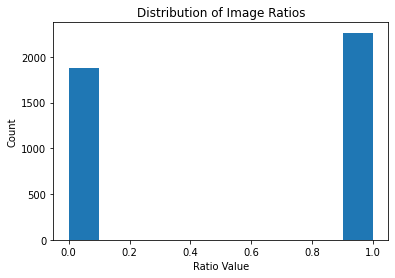

In [6]:
plt.hist(train_data.classes)
plt.title('Distribution of Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show()


### Show some imgs from dataset

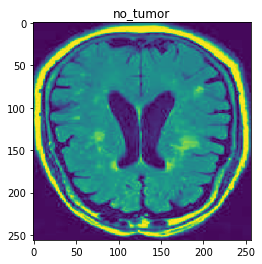

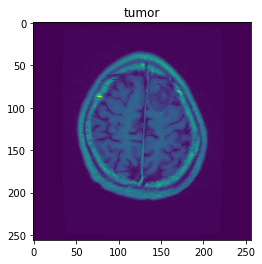

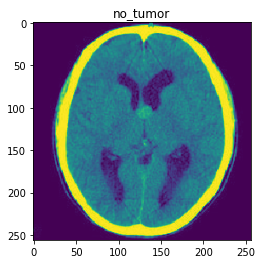

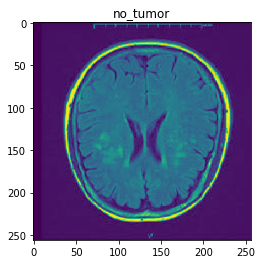

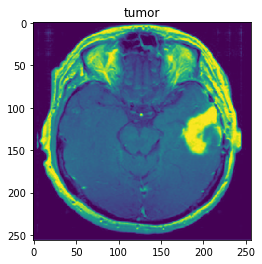

In [7]:
for _ in range(5):
    img, label = train_data.next()
    plt.imshow(img[0])
    
    inv_dict = {value:key for key, value in class_names.items()}
    plt.title(inv_dict[np.argmax(label[0])])
    plt.show()

## 4. Create the model

In [8]:
model = models.Sequential()
#
model.add(layers.Conv2D(filters = 64, kernel_size = (6,6), 
                 activation ='relu',input_shape=(img_height, img_width, 1)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

#
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

#
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

#
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

# 
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_names),  activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 251, 251, 64)      2368      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 123, 123, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 61, 61, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 128)       1

## 5. Train the model

In [9]:

# epochs to train
epochs = 10

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
#opt = tf.keras.optimizers.Adam(learning_rate=0.00008)
model.compile(optimizer=opt,
            loss=tf.keras.losses.categorical_crossentropy,
            metrics=['accuracy'])

# steps_per_epoch=steps,
history = model.fit(train_data, epochs=epochs, validation_data=val_data)



Epoch 1/10
130/130 [==============================] - 245s 2s/step - loss: 0.6029 - accuracy: 0.6768 - val_loss: 0.5369 - val_accuracy: 0.7261
Epoch 2/10
130/130 [==============================] - 245s 2s/step - loss: 0.4178 - accuracy: 0.8000 - val_loss: 0.3649 - val_accuracy: 0.8413
Epoch 3/10
130/130 [==============================] - 245s 2s/step - loss: 0.3288 - accuracy: 0.8572 - val_loss: 0.3253 - val_accuracy: 0.8826
Epoch 4/10
130/130 [==============================] - 244s 2s/step - loss: 0.2271 - accuracy: 0.9112 - val_loss: 0.1690 - val_accuracy: 0.9413
Epoch 5/10
130/130 [==============================] - 243s 2s/step - loss: 0.1918 - accuracy: 0.9284 - val_loss: 0.1559 - val_accuracy: 0.9435
Epoch 6/10
130/130 [==============================] - 243s 2s/step - loss: 0.1184 - accuracy: 0.9544 - val_loss: 0.0983 - val_accuracy: 0.9652
Epoch 7/10
130/130 [==============================] - 244s 2s/step - loss: 0.0856 - accuracy: 0.9703 - val_loss: 0.0569 - val_accuracy: 0.9848

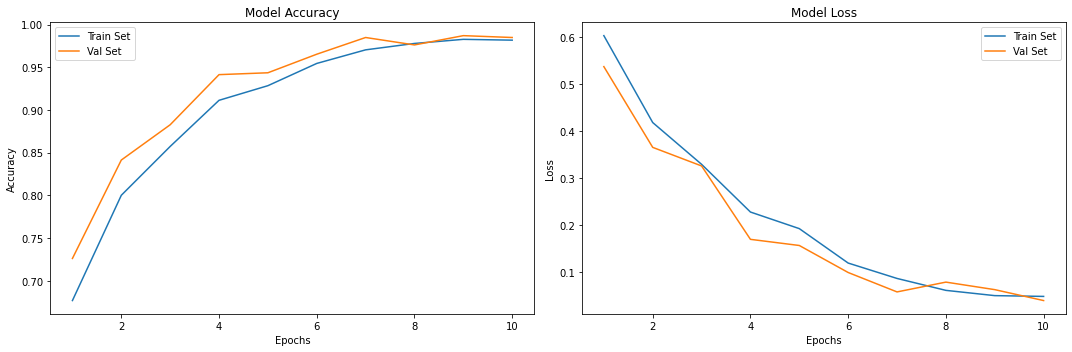

In [13]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(val_data, verbose=2)

15/15 - 4s - loss: 0.0385 - accuracy: 0.9848


In [1]:
test_path = './data_test/'
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(test_path, 
                                           target_size=(img_height, img_width), 
                                           color_mode='grayscale',
                                           batch_size=batch_size, 
                                           class_mode='categorical',
                                           shuffle=True,
                                           seed=52)

for _ in range(30):
    img, label = test_data.next()   
    prediction= model.predict(img)
    plt.imshow(img[0])
    inv_dict = {value:key for key, value in class_names.items()}
    plt.title('Predic=>'+inv_dict[np.argmax(prediction[0])]+ '  Real=>'+inv_dict[np.argmax(label[0])])
    if np.argmax(prediction[0]) != np.argmax(label[0]):
        print("ERROR")
    else:
        print("OK")
    plt.show()
    


NameError: name 'ImageDataGenerator' is not defined

In [19]:
target_dir = './'+modelName+'/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
model.save(target_dir+'m.h5')
model.save_weights(target_dir+'w.h5')